In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#initializing into managable data
df = pd.read_parquet('total.parq')
dfp = pd.read_parquet('total_playoffs.parq')
dr = pd.read_parquet('roster.parq')
dad = pd.read_parquet('advanced.parq')
dav = pd.read_parquet('average.parq')
dadp = pd.read_parquet('advanced_playoffs.parq')
davp = pd.read_parquet('average_playoffs.parq')

In [13]:
#creating another column
players_PPG = df.copy()
players_PPG['PPG'] = players_PPG['PTS'] / players_PPG['G']
players_PPG = players_PPG.sort_values('season', ascending=True)
players_PPG

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,team,season,team_retcon,PPG
0,1.0,Christian Laettner,25.0,81,80.0,2770,450,920,0.489,13,...,234,101,87,225,302,1322,MIN,1995/1996,MIN,16.320988
2611,3.0,Hersey Hawkins,28.0,82,82.0,2731,390,809,0.482,131,...,262,122,18,150,178,1172,CHH,1995/1996,CHO,14.292683
2612,4.0,Muggsy Bogues,30.0,78,78.0,2629,348,730,0.477,6,...,675,103,0,132,151,862,CHH,1995/1996,CHO,11.051282
2613,5.0,Scott Burrell,24.0,65,62.0,2014,277,593,0.467,96,...,161,75,40,85,187,750,CHH,1995/1996,CHO,11.538462
2614,6.0,Dell Curry,30.0,69,0.0,1718,343,778,0.441,154,...,113,55,18,98,144,935,CHH,1995/1996,CHO,13.550725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9485,13.0,TyTy Washington Jr.,21.0,31,2.0,433,58,160,0.363,19,...,47,15,2,14,29,145,HOU,2023/2024,HOU,4.677419
9486,14.0,Bruno Fernando,24.0,31,4.0,364,48,93,0.516,0,...,30,6,31,20,68,126,HOU,2023/2024,HOU,4.064516
9487,15.0,Boban Marjanović,34.0,31,0.0,171,41,60,0.683,0,...,9,5,2,14,10,102,HOU,2023/2024,HOU,3.290323
9489,17.0,Trevor Hudgins,23.0,5,0.0,28,2,9,0.222,2,...,3,0,0,1,1,9,HOU,2023/2024,HOU,1.800000


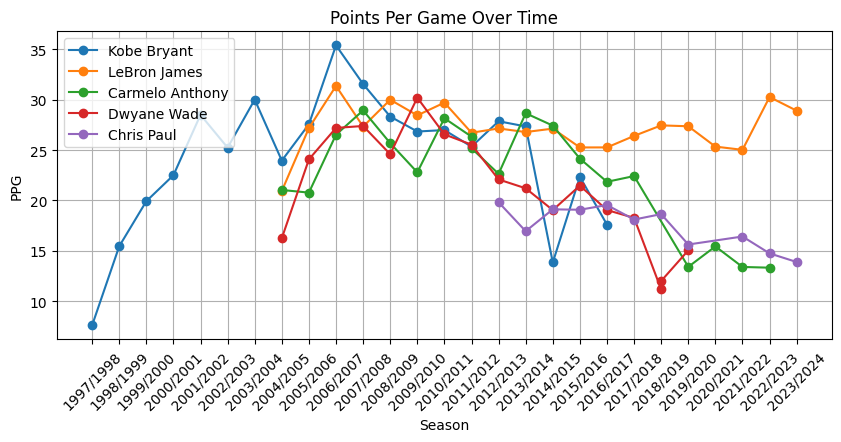

In [14]:
#plotting data
plt.figure(figsize=(10, 4))
plt.plot(players_PPG[players_PPG['Player'] == 'Kobe Bryant']['season'], players_PPG[players_PPG['Player'] == 'Kobe Bryant']['PPG'], label='Kobe Bryant', marker='o')
plt.plot(players_PPG[players_PPG['Player'] == 'LeBron James']['season'], players_PPG[players_PPG['Player'] == 'LeBron James']['PPG'], label='LeBron James', marker='o')
plt.plot(players_PPG[players_PPG['Player'] == 'Carmelo Anthony']['season'], players_PPG[players_PPG['Player'] == 'Carmelo Anthony']['PPG'], label='Carmelo Anthony', marker='o')
plt.plot(players_PPG[players_PPG['Player'] == 'Dwyane Wade']['season'], players_PPG[players_PPG['Player'] == 'Dwyane Wade']['PPG'], label='Dwyane Wade', marker='o')
plt.plot(players_PPG[players_PPG['Player'] == 'Chris Paul']['season'], players_PPG[players_PPG['Player'] == 'Chris Paul']['PPG'], label='Chris Paul', marker='o')
plt.title('Points Per Game Over Time')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


In [48]:
#importing relevant models, metrics, and ml training tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from scipy.stats import linregress
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import ndcg_score

s23 = df[df['season'] == '2023/2024'].dropna().sort_values("Age", ascending=True)
# X is the input features, y is the target variable
X = s23[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]
y = s23['PTS']

In [16]:
X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

dmodel = DecisionTreeRegressor()
dmodel.fit(X_train, y_train)

mlp = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000)
mlp.fit(X_train, y_train)

knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

log = LogisticRegression()
log.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

enr = ElasticNet()
enr.fit(X_train, y_train)

y_pred = model.predict(X_test.sort_values("Age", ascending=True))
dy_pred = dmodel.predict(X_test.sort_values("Age", ascending=True))
mlp_pred = mlp.predict(X_test.sort_values("Age", ascending=True))
knnr_pred = knnr.predict(X_test.sort_values("Age", ascending=True))
gbr_pred = gbr.predict(X_test.sort_values("Age", ascending=True))
svr_pred = svr.predict(X_test.sort_values("Age", ascending=True))


mse = mean_squared_error(y_test, y_pred)
# Set a tolerance level for considering a prediction as a "hit"
tolerance = 100  # You can adjust this based on your specific requirements

# Calculate the hit ratio
hits = sum(abs(y_test - y_pred) <= tolerance)
hit_ratio = hits / len(y_test)

print(f'Hit Ratio (within {tolerance} points): {hit_ratio:.2%}')

print(f'Mean Squared Error for linear regression: {mse}')

dmse = mean_squared_error(y_test, dy_pred)
print(f'Mean Squared Error for decision tree regression: {dmse}')

mlp_mse = mean_squared_error(y_test, mlp_pred)
print(f'Mean Squared Error for mlp regression: {mlp_mse}')

knnr_mse = mean_squared_error(y_test, knnr_pred)
print(f'Mean Squared Error for knn regression: {knnr_mse}')

gbr_mse = mean_squared_error(y_test, gbr_pred)
print(f'Mean Squared Error for gb regression: {gbr_mse}')

svr_mse = mean_squared_error(y_test, svr_pred)
print(f'Mean Squared Error for sv regression: {svr_mse}')

Hit Ratio (within 100 points): 28.74%
Mean Squared Error for linear regression: 350825.49425287504
Mean Squared Error for decision tree regression: 360643.4367816092
Mean Squared Error for mlp regression: 351390.0684565044
Mean Squared Error for knn regression: 365513.2622126437
Mean Squared Error for gb regression: 357707.07800445496
Mean Squared Error for sv regression: 350811.9285002125


In [19]:
#merged both dataframes to include a lot of features for training
df1 = pd.merge(df, dad, on=['Player', 'Age', 'season', 'Rk', 'G', 'team', 'team_retcon', 'MP'], how='outer')

In [20]:
df1 = df1.drop(['Unnamed: 17', 'Unnamed: 22'], axis=1)

In [173]:
from sklearn.neighbors import NearestNeighbors

target_player = 'LeBron James'
target_season = '2017/2018'  

target_player_data = df1[(df1['Player'] == target_player) & (df1['season'] == target_season)]

features = df1[[    'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].dropna()

features = features[(features['G'] > 40) & (features['PER'] > 20)]

knn = NearestNeighbors(n_neighbors=6) 
knn.fit(features)

distances, indices = knn.kneighbors(target_player_data.drop(['Player', 'season', 'team', 'team_retcon', 'Age', 'Rk'], axis=1))

nearest_players = df1.iloc[indices[0][1:]]  

nearest_players[['Player', 'season', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]# Include the columns you're interested in


,Player,season,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
65,Joe Smith,1999/2000,43,42.0,1418,223,522,0.427,0,3,...,0.755,154,200,354,68,32,66,66,147,588
146,Fred Hoiberg,2004/2005,79,3.0,1804,178,383,0.465,76,172,...,0.845,21,247,268,109,66,10,44,136,530
67,Dean Garrett,1999/2000,49,37.0,1054,116,231,0.502,0,0,...,0.745,99,158,257,28,30,45,29,113,270
44,Chris Carr,1997/1998,55,10.0,830,125,271,0.461,31,88,...,0.767,31,82,113,48,24,10,37,93,337
354,Nemanja Bjelica,2016/2017,60,0.0,1075,110,235,0.468,48,125,...,0.727,49,161,210,83,26,21,47,154,308


In [21]:
df1[df1["Player"] == "LeBron James"]

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
1338,1.0,LeBron James,26.0,79,79.0,3063,758,1485,0.510,92,...,13.8,31.5,10.3,5.3,15.6,0.244,6.3,1.8,8.1,7.8
1355,1.0,LeBron James,27.0,62,62.0,2326,621,1169,0.531,54,...,13.3,32.0,10.0,4.5,14.5,0.298,8.2,2.7,10.9,7.6
1371,1.0,LeBron James,28.0,76,76.0,2877,765,1354,0.565,103,...,12.4,30.2,14.6,4.7,19.3,0.322,9.3,2.4,11.7,9.9
1389,1.0,LeBron James,29.0,77,77.0,2902,767,1353,0.567,116,...,14.4,31.0,12.3,3.7,15.9,0.264,7.8,1.1,8.8,7.9
2205,1.0,LeBron James,19.0,79,79.0,3122,622,1492,0.417,63,...,13.9,28.2,2.4,2.6,5.1,0.078,2.3,-0.6,1.7,2.9
2226,1.0,LeBron James,20.0,80,80.0,3388,795,1684,0.472,108,...,11.8,29.7,9.7,4.6,14.3,0.203,7.0,1.7,8.6,9.1
2242,1.0,LeBron James,21.0,79,79.0,3361,875,1823,0.480,127,...,10.7,33.6,12.0,4.3,16.3,0.232,7.5,1.6,9.1,9.4
2259,1.0,LeBron James,22.0,78,78.0,3190,772,1621,0.476,99,...,11.5,31.0,8.0,5.7,13.7,0.206,5.9,2.2,8.1,8.1
2274,1.0,LeBron James,23.0,75,74.0,3027,794,1642,0.484,113,...,11.4,33.5,10.7,4.6,15.2,0.242,8.2,2.6,10.9,9.8
2297,1.0,LeBron James,24.0,81,81.0,3054,789,1613,0.489,132,...,11.0,33.8,13.7,6.5,20.3,0.318,9.5,3.7,13.2,11.8


THIS IS WHERE MY PLAYING AROUND ENDS AND THE ACTUAL PROJECT STARTS

In [160]:
#initially copied the merged dataframe because I wanted to calculate PPG but later decided PER 
df1ppg = df1.copy()
df1ppg['PPG'] = df1ppg['PTS'] / df1ppg['G']

#decided to train the data on the latest season
s23 = df1ppg[df1ppg['season'].isin(['2023/2024'])].dropna().sort_values("Age", ascending=True)

#all string, redundant, and target features were excluded from independent features
X = s23.drop(['Player', 'team', 'team_retcon', 'season', 'PPG', 'VORP', 'ORB', 'DRB', 'OWS', 'DWS', 'OBPM', 'DBPM', 'PER'], axis=1)
y = s23['PER']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

dmodel = DecisionTreeRegressor()
dmodel.fit(X_train, y_train)

#parameters obtained from tuning at the bottom of the file
mlp = MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50),
             max_iter=400, random_state=42)
mlp.fit(X_train, y_train)

knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

#parameters obtained from tuning at the bottom of the file
rfr = RandomForestRegressor(min_samples_leaf=2, n_estimators=150, random_state=42)
rfr.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

enr = ElasticNet(alpha=1.0, l1_ratio=0.5)
enr.fit(X_train, y_train)

y_pred = model.predict(X_test)
dy_pred = dmodel.predict(X_test)
mlp_pred = mlp.predict(X_test)
knnr_pred = knnr.predict(X_test)
gbr_pred = gbr.predict(X_test)
svr_pred = svr.predict(X_test)
lasso_pred = lasso.predict(X_test)
rfr_pred = rfr.predict(X_test)
ridge_pred = ridge.predict(X_test)
enr_pred = enr.predict(X_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+02, tolerance: 8.150e-01
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+02, tolerance: 8.150e-01
  model = cd_fast.enet_coordinate_descent(


In [162]:
#since the data is rather large in size, a lower tolerance for a hit is required
tolerance = .1
sorted_indices = np.argsort(y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#array of hits (the difference between the test and pred is less than the tolerance) with 1 being a hit and 0 being a miss
correct = np.where(np.abs(y_test - y_pred) <= tolerance, 1, 0)
ap = average_precision_score(correct, y_pred) 

#sum of all the hits
hits = sum(abs(y_test - y_pred) <= tolerance)
hit_ratio = hits / len(y_test)

print(f'Linear Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'Linear Regression Mean Average Precision (MAP): {ap}')
print(f'R^2 value for Linear Regression: {r2}')
print(f'Mean Squared Error for linear regression: {mse}\n')

dmse = mean_squared_error(y_test, dy_pred)
dr2 = r2_score(y_test, dy_pred)
dcorrect = np.where(np.abs(y_test - dy_pred) <= tolerance, 1, 0)
dap = average_precision_score(dcorrect, dy_pred) 
dhits = sum(abs(y_test - dy_pred) <= tolerance)
dhit_ratio = dhits / len(y_test)

print(f'Decision Tree Regression Hit Ratio (within {tolerance} PER): {dhit_ratio:.2%}')
print(f'Decision Tree Regression Mean Average Precision (MAP): {dap}')
print(f'R^2 value for Decision Tree Regression: {dr2}')
print(f'Mean Squared Error for Decision Tree Regression: {dmse}\n')

mlp_mse = mean_squared_error(y_test, mlp_pred) 
mlpr2 = r2_score(y_test, mlp_pred)
mlp_correct = np.where(np.abs(y_test - mlp_pred) <= tolerance, 1, 0)
mlp_ap = average_precision_score(mlp_correct, mlp_pred) 
mlp_hits = sum(abs(y_test - mlp_pred) <= tolerance)
mlp_hit_ratio = mlp_hits / len(y_test)

print(f'Multi-Layer Perceptron Regression Hit Ratio (within {tolerance} PER): {mlp_hit_ratio:.2%}')
print(f'MLP Regression Mean Average Precision (MAP): {mlp_ap}')
print(f'R^2 value for MLP Regression: {mlpr2}')
print(f'Mean Squared Error for mlp regression: {mlp_mse}\n')

knnr_mse = mean_squared_error(y_test, knnr_pred)
knnr2 = r2_score(y_test, knnr_pred)
knn_correct = np.where(np.abs(y_test - knnr_pred) <= tolerance, 1, 0)
knn_ap = average_precision_score(knn_correct, knnr_pred) 
knnr_hits = sum(abs(y_test - knnr_pred) <= tolerance)
knnr_hit_ratio = knnr_hits / len(y_test)

print(f'K Nearest Neighbor Regression Hit Ratio (within {tolerance} PER): {knnr_hit_ratio:.2%}')
print(f'KNN Regression Mean Average Precision (MAP): {knn_ap}')
print(f'R^2 value for KNN Regression: {knnr2}')
print(f'Mean Squared Error for KNN Regression: {knnr_mse}\n')

gbr_mse = mean_squared_error(y_test, gbr_pred)
gbrr2 = r2_score(y_test, gbr_pred)
gbr_correct = np.where(np.abs(y_test - gbr_pred) <= tolerance, 1, 0)
gbr_ap = average_precision_score(gbr_correct, gbr_pred) 
gbr_hits = sum(abs(y_test - gbr_pred) <= tolerance)
gbr_hit_ratio = gbr_hits / len(y_test)

print(f'Gradient Boosting Regression Hit Ratio (within {tolerance} PER): {gbr_hit_ratio:.2%}')
print(f'Gradient Boosting Regression Mean Average Precision (MAP): {gbr_ap}')
print(f'R^2 value for Gradient Boosting Regression: {gbrr2}')
print(f'Mean Squared Error for Gradient Boosting Regression: {gbr_mse}\n')



Linear Regression Hit Ratio (within 0.1 PER): 22.99%
Linear Regression Mean Average Precision (MAP): 0.2638788192411136
R^2 value for Linear Regression: 0.9831414047176867
Mean Squared Error for linear regression: 0.3618298675461187

Decision Tree Regression Hit Ratio (within 0.1 PER): 2.30%
Decision Tree Regression Mean Average Precision (MAP): 0.07045454545454546
R^2 value for Decision Tree Regression: 0.8485365527555809
Mean Squared Error for Decision Tree Regression: 3.25080459770115

Multi-Layer Perceptron Regression Hit Ratio (within 0.1 PER): 13.79%
MLP Regression Mean Average Precision (MAP): 0.2306910209559804
R^2 value for MLP Regression: 0.8800305083998966
Mean Squared Error for mlp regression: 2.574861340955355

K Nearest Neighbor Regression Hit Ratio (within 0.1 PER): 3.45%
KNN Regression Mean Average Precision (MAP): 0.19496487119437939
R^2 value for KNN Regression: 0.5350138577443935
Mean Squared Error for KNN Regression: 9.979827586206898

Gradient Boosting Regression H

In [163]:
svr_mse = mean_squared_error(y_test, svr_pred)
svrr2 = r2_score(y_test, svr_pred)
svr_correct = np.where(np.abs(y_test - svr_pred) <= tolerance, 1, 0)
svr_ap = average_precision_score(svr_correct, svr_pred) 
svr_hits = sum(abs(y_test - svr_pred) <= tolerance)
svr_hit_ratio = svr_hits / len(y_test)

print(f'Support Vector Regression Hit Ratio (within {tolerance} PER): {svr_hit_ratio:.2%}')
print(f'Support Vector Regression Mean Average Precision (MAP): {svr_ap}')
print(f'R^2 value for Support Vector Regression: {svrr2}')
print(f'Mean Squared Error for Support Vector Regression: {svr_mse}\n')

lasso_mse = mean_squared_error(y_test, lasso_pred)
lassor2 = r2_score(y_test, lasso_pred)
lasso_correct = np.where(np.abs(y_test - lasso_pred) <= tolerance, 1, 0)
lasso_ap = average_precision_score(lasso_correct, lasso_pred) 
lasso_hits = sum(abs(y_test - lasso_pred) <= tolerance)
lasso_hit_ratio = lasso_hits / len(y_test)

print(f'Lasso Regression Hit Ratio (within {tolerance} PER): {lasso_hit_ratio:.2%}')
print(f'Lasso Regression Mean Average Precision (MAP): {lasso_ap}')
print(f'R^2 value for Lasso Regression: {lassor2}')
print(f'Mean Squared Error for Lasso Regression: {lasso_mse}\n')

rfr_mse = mean_squared_error(y_test, rfr_pred)
rfrr2 = r2_score(y_test, rfr_pred)
rfr_correct = np.where(np.abs(y_test - rfr_pred) <= tolerance, 1, 0)
rfr_ap = average_precision_score(rfr_correct, rfr_pred) 
rfr_hits = sum(abs(y_test - rfr_pred) <= tolerance)
rfr_hit_ratio = rfr_hits / len(y_test)

print(f'Random Forest Regression Hit Ratio (within {tolerance} PER): {rfr_hit_ratio:.2%}')
print(f'Random Forest Regression Mean Average Precision (MAP): {rfr_ap}')
print(f'R^2 value for Random Forest Regression: {rfrr2}')
print(f'Mean Squared Error for Random Forest Regression: {rfr_mse}\n')

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridger2 = r2_score(y_test, ridge_pred)
ridge_correct = np.where(np.abs(y_test - ridge_pred) <= tolerance, 1, 0)
ridge_ap = average_precision_score(ridge_correct, ridge_pred) 
ridge_hits = sum(abs(y_test - ridge_pred) <= tolerance)
ridge_hit_ratio = ridge_hits / len(y_test)

print(f'Ridge Regression Hit Ratio (within {tolerance} PER): {ridge_hit_ratio:.2%}')
print(f'Ridge Regression Mean Average Precision (MAP): {ridge_ap}')
print(f'R^2 value for Ridge Regression: {ridger2}')
print(f'Mean Squared Error for Ridge Regression: {ridge_mse}\n')

enr_mse = mean_squared_error(y_test, enr_pred)
enrr2 = r2_score(y_test, enr_pred)
enr_correct = np.where(np.abs(y_test - enr_pred) <= tolerance, 1, 0)
enr_ap = average_precision_score(enr_correct, enr_pred) 
enr_hits = sum(abs(y_test - enr_pred) <= tolerance)
enr_hit_ratio = enr_hits / len(y_test)

print(f'Elastic Net Regression Hit Ratio (within {tolerance} PER): {enr_hit_ratio:.2%}')
print(f'Elastic Net Mean Average Precision (MAP): {enr_ap}')
print(f'R^2 value for Elastic Net Regression: {enrr2}')
print(f'Mean Squared Error for Elastic Net Regression: {enr_mse}\n')

Support Vector Regression Hit Ratio (within 0.1 PER): 8.05%
Support Vector Regression Mean Average Precision (MAP): 0.1426942373447982
R^2 value for Support Vector Regression: 0.9496293665030867
Mean Squared Error for Support Vector Regression: 1.0810864927473047

Lasso Regression Hit Ratio (within 0.1 PER): 6.90%
Lasso Regression Mean Average Precision (MAP): 0.11377865961199293
R^2 value for Lasso Regression: 0.8985766573570075
Mean Squared Error for Lasso Regression: 2.1768121258062

Random Forest Regression Hit Ratio (within 0.1 PER): 6.90%
Random Forest Regression Mean Average Precision (MAP): 0.10242510462020336
R^2 value for Random Forest Regression: 0.8998993657108636
Mean Squared Error for Random Forest Regression: 2.1484233199499965

Ridge Regression Hit Ratio (within 0.1 PER): 18.39%
Ridge Regression Mean Average Precision (MAP): 0.19605535232947224
R^2 value for Ridge Regression: 0.9674362527188508
Mean Squared Error for Ridge Regression: 0.6989038035633299

Elastic Net Reg

There are 2 code blocks to display the results due to the max amount reached if all the result code was in one block

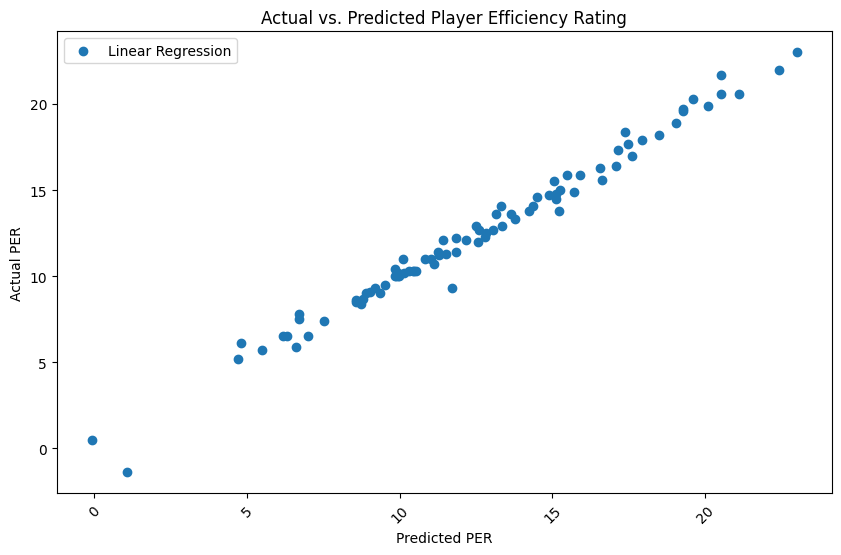

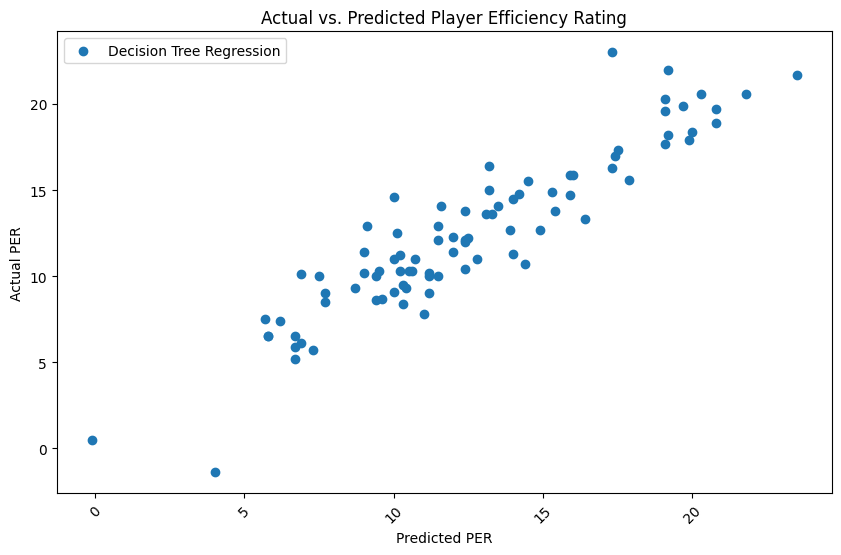

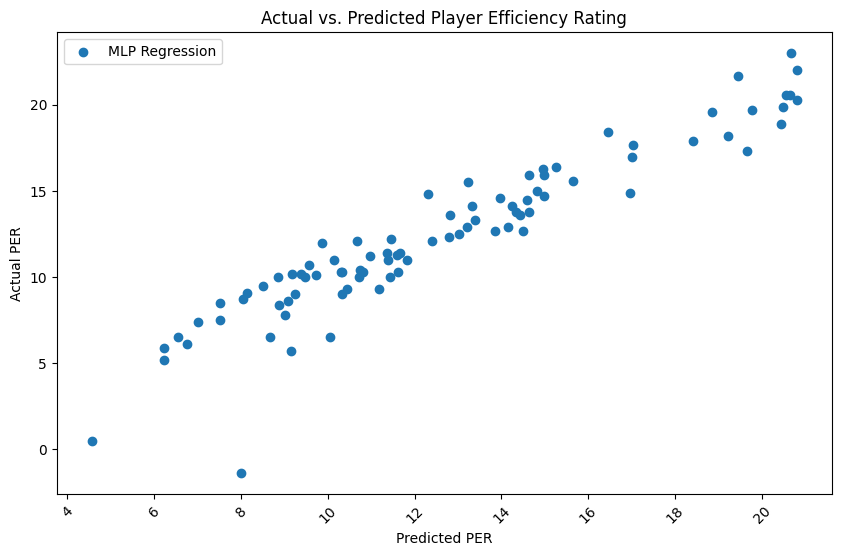

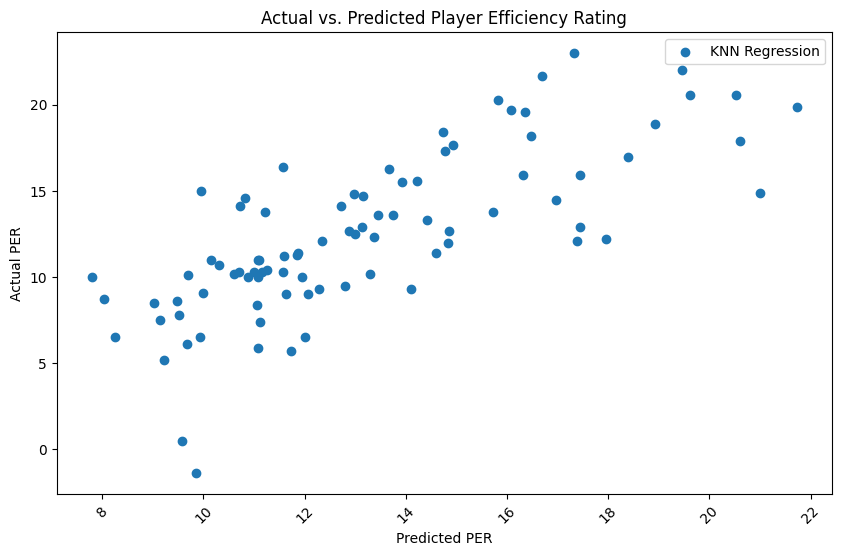

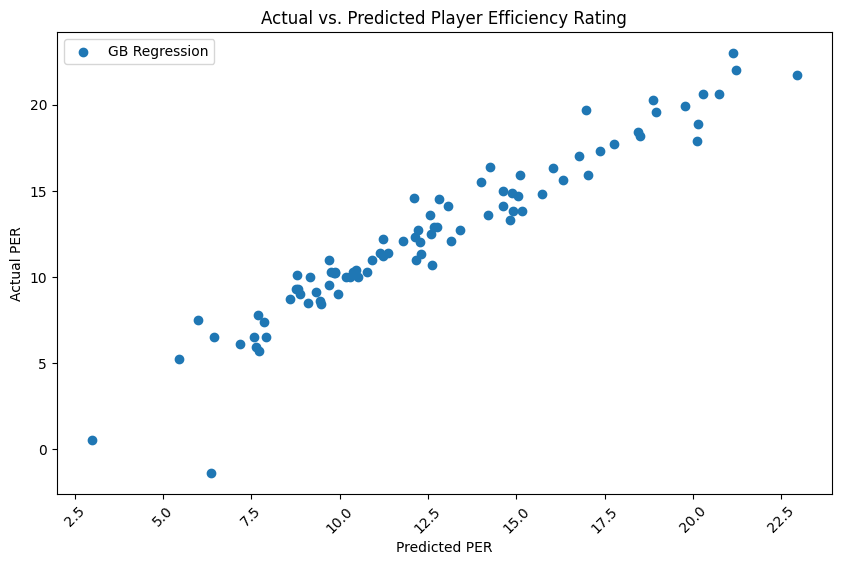

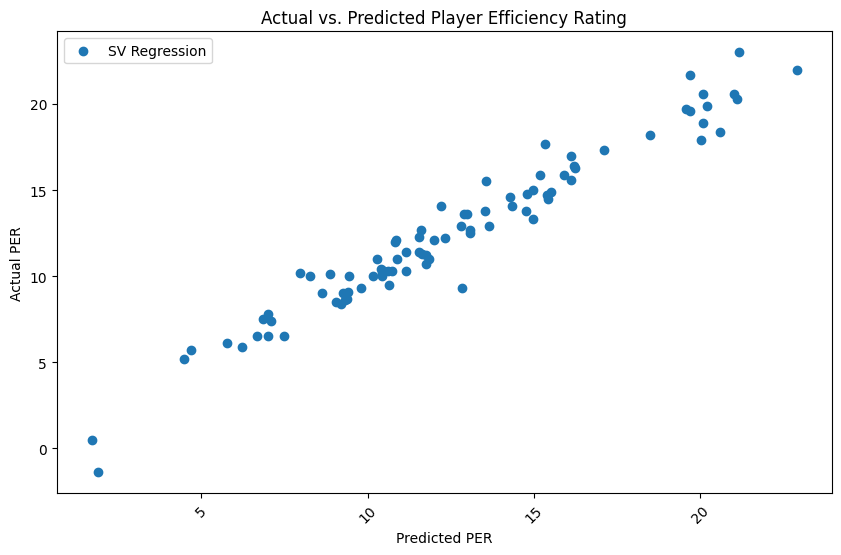

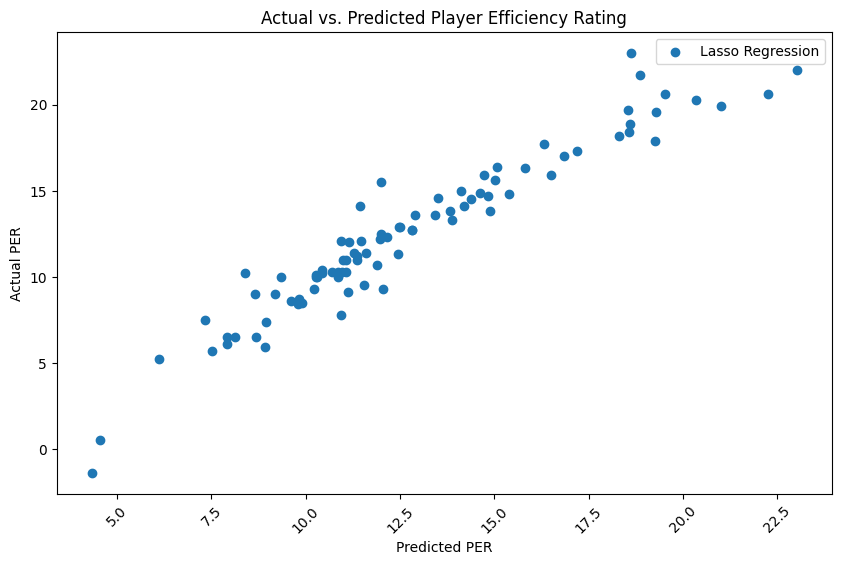

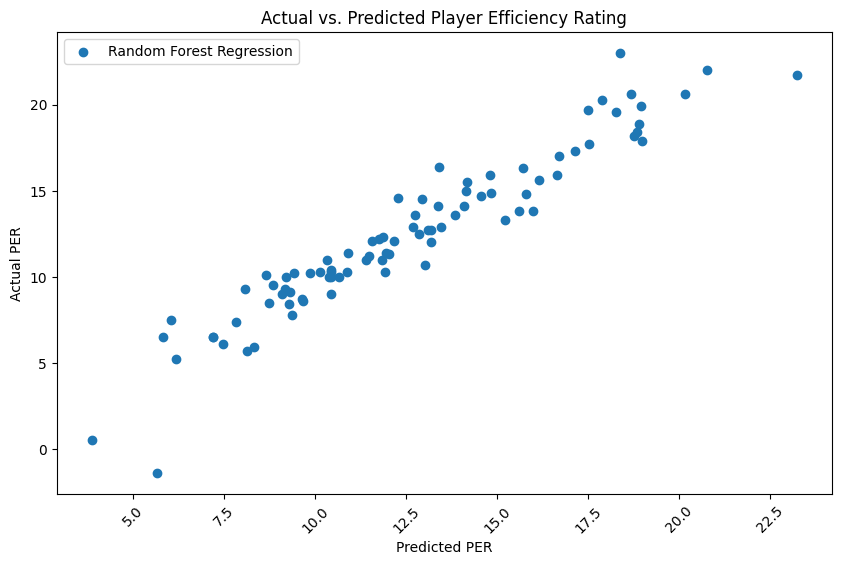

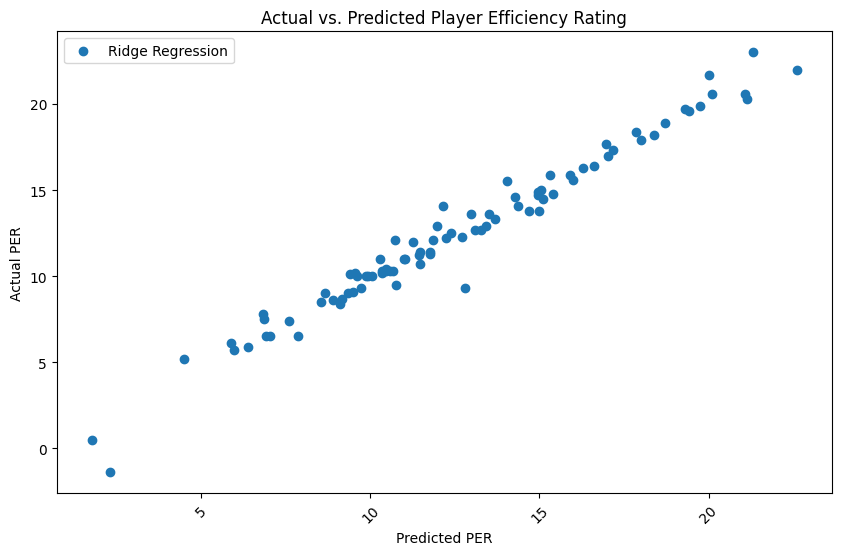

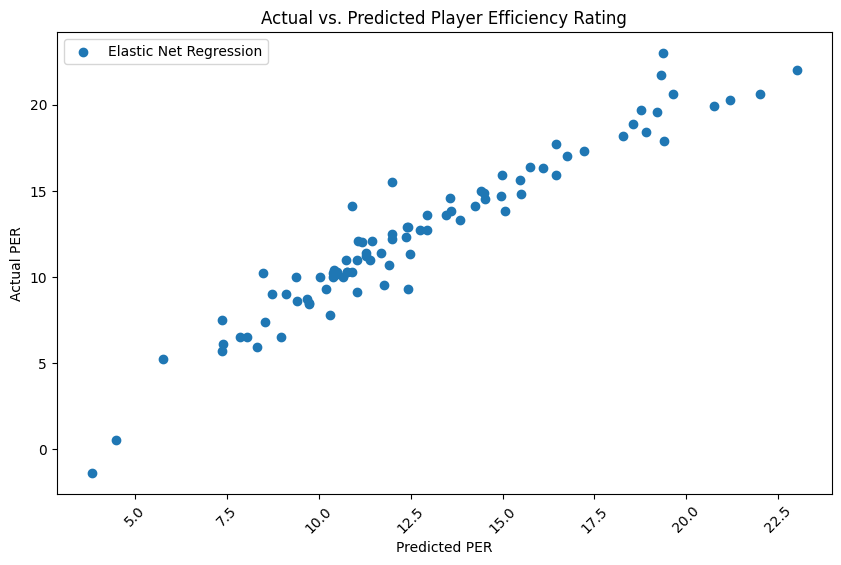

In [199]:
#each plot is the predicted PER vs the actual PER for each model
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, label='Linear Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dy_pred, y_test, label='Decision Tree Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mlp_pred, y_test, label='MLP Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(knnr_pred, y_test, label='KNN Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(gbr_pred, y_test, label='GB Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(svr_pred, y_test, label='SV Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lasso_pred, y_test, label='Lasso Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(rfr_pred, y_test, label='Random Forest Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ridge_pred, y_test, label='Ridge Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(enr_pred, y_test, label='Elastic Net Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating')
plt.legend()
plt.show()

In [166]:
#the dataframe for the specific player is instantiated and the independent/dependent variables are defined
le = df1ppg[df1ppg['Player'].isin(['LeBron James'])]
lebronX = le.drop(['Player', 'team', 'team_retcon', 'season', 'PPG', 'VORP', 'ORB', 'DRB', 'OWS', 'DWS', 'OBPM', 'DBPM', 'PER'], axis=1)
lebronY = le['PER']

In [167]:
#each model predicts based on the independent variable from the last block
lin_lebron = model.predict(lebronX)

dec_lebron = dmodel.predict(lebronX)

mlp_lebron = mlp.predict(lebronX)

knn_lebron = knnr.predict(lebronX)

gbr_lebron = gbr.predict(lebronX)

svr_lebron = svr.predict(lebronX)

lasso_lebron = lasso.predict(lebronX)

rfr_lebron = rfr.predict(lebronX)

ridge_lebron = ridge.predict(lebronX)

enr_lebron = enr.predict(lebronX)

In [196]:
#tolerance this time is 1 due to the smaller amount of data, so a higher tolerance makes it easier visualize the effectiveness of a model
tolerance = 1
lelin_mse = mean_squared_error(lebronY, lin_lebron)
lelin_r2 = r2_score(le.PER, lin_lebron)
correct = np.where(np.abs(lebronY - lin_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, lin_lebron) 
hits = sum(abs(lebronY - lin_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'Linear Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'Linear Regression Mean Average Precision (MAP): {ap}')
print(f"Linear Regression Prediction MSE for LeBron James: {lelin_mse}")
print(f"Linear Regression Prediction R^2 for LeBron James: {lelin_r2}\n")

ledec_mse = mean_squared_error(lebronY, dec_lebron)
ledec_r2 = r2_score(le.PER, dec_lebron)
correct = np.where(np.abs(lebronY - dec_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, dec_lebron) 
hits = sum(abs(lebronY - dec_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'Decision Tree Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'Decision Tree Mean Average Precision (MAP): {ap}')
print(f"Decision Tree Regression Prediction MSE for LeBron James: {ledec_mse}")
print(f"Decision Tree Prediction R^2 for LeBron James: {ledec_r2}\n")

lemlp_mse = mean_squared_error(lebronY, mlp_lebron)
lemlp_r2 = r2_score(le.PER, mlp_lebron)
correct = np.where(np.abs(lebronY - mlp_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, mlp_lebron) 
hits = sum(abs(lebronY - mlp_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'MLP Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'MLP Regression Mean Average Precision (MAP): {ap}')
print(f"MLP Regression Prediction MSE for LeBron James: {lemlp_mse}")
print(f"MLP Regression Prediction R^2 for LeBron James: {lemlp_r2}\n")

leKNN_mse = mean_squared_error(lebronY, knn_lebron)
leKNN_r2 = r2_score(le.PER, knn_lebron)
correct = np.where(np.abs(lebronY - knn_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, knn_lebron) 
hits = sum(abs(lebronY - knn_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'KNN Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'KNN Regression Mean Average Precision (MAP): {ap}')
print(f"KNN Regression Prediction MSE for LeBron James: {leKNN_mse}")
print(f"KNN Regression Prediction R^2 for LeBron James: {leKNN_r2}\n")

legbr_mse = mean_squared_error(lebronY, gbr_lebron)
legbr_r2 = r2_score(le.PER, gbr_lebron)
correct = np.where(np.abs(lebronY - gbr_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, gbr_lebron) 
hits = sum(abs(lebronY - gbr_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'GB Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'GB Regression Mean Average Precision (MAP): {ap}')
print(f"GB Regression Prediction MSE for LeBron James: {legbr_mse}")
print(f"GB Regression Prediction R^2 for LeBron James: {legbr_r2}\n")

Linear Regression Hit Ratio (within 1 PER): 20.00%
Linear Regression Mean Average Precision (MAP): 0.3060876623376624
Linear Regression Prediction MSE for LeBron James: 17.268039542282228
Linear Regression Prediction R^2 for LeBron James: -0.7752870433830121

Decision Tree Hit Ratio (within 1 PER): 50.00%
Decision Tree Mean Average Precision (MAP): 0.6658891547049441
Decision Tree Regression Prediction MSE for LeBron James: 3.8580000000000005
Decision Tree Prediction R^2 for LeBron James: 0.6033679795207108

MLP Regression Hit Ratio (within 1 PER): 0.00%
MLP Regression Mean Average Precision (MAP): -0.0
MLP Regression Prediction MSE for LeBron James: 48.22803235582178
MLP Regression Prediction R^2 for LeBron James: -3.9582120054510446

KNN Regression Hit Ratio (within 1 PER): 0.00%
KNN Regression Mean Average Precision (MAP): -0.0
KNN Regression Prediction MSE for LeBron James: 40.040937500000005
KNN Regression Prediction R^2 for LeBron James: -3.116515796399675

GB Regression Hit Rati

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [197]:
lesvr_mse = mean_squared_error(lebronY, svr_lebron)
lesvr_r2 = r2_score(le.PER, svr_lebron)
correct = np.where(np.abs(lebronY - svr_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, svr_lebron) 
hits = sum(abs(lebronY - svr_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'SV Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'SV Regression Mean Average Precision (MAP): {ap}')
print(f"SV Regression Prediction MSE for LeBron James: {lesvr_mse}")
print(f"SV Regression Prediction R^2 for LeBron James: {lesvr_r2}\n")

lelas_mse = mean_squared_error(lebronY, lasso_lebron)
lelas_r2 = r2_score(le.PER, lasso_lebron)
correct = np.where(np.abs(lebronY - lasso_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, lasso_lebron) 
hits = sum(abs(lebronY - lasso_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'Lasso Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'Lasso Regression Mean Average Precision (MAP): {ap}')
print(f"Lasso Regression Prediction MSE for LeBron James: {lelas_mse}")
print(f"Lasso Regression Prediction R^2 for LeBron James: {lelas_r2}\n")

lerfr_mse = mean_squared_error(lebronY, rfr_lebron)
lerfr_r2 = r2_score(le.PER, rfr_lebron)
correct = np.where(np.abs(lebronY - rfr_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, rfr_lebron) 
hits = sum(abs(lebronY - rfr_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'RF Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'RF Regression Mean Average Precision (MAP): {ap}')
print(f"RF Regression Prediction MSE for LeBron James: {lerfr_mse}")
print(f"RF Regression Prediction R^2 for LeBron James: {lerfr_r2}\n")

lerid_mse = mean_squared_error(lebronY, ridge_lebron)
lerid_r2 = r2_score(le.PER, ridge_lebron)
correct = np.where(np.abs(lebronY - ridge_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, ridge_lebron) 
hits = sum(abs(lebronY - ridge_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'Ridge Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'Ridge Regression Mean Average Precision (MAP): {ap}')
print(f"Ridge Regression Prediction MSE for LeBron James: {lerid_mse}")
print(f"Ridge Regression Prediction R^2 for LeBron James: {lerid_r2}\n")

leenr_mse = mean_squared_error(lebronY, enr_lebron)
leenr_r2 = r2_score(le.PER, enr_lebron)
correct = np.where(np.abs(lebronY - enr_lebron) <= tolerance, 1, 0)
ap = average_precision_score(correct, enr_lebron) 
hits = sum(abs(lebronY - enr_lebron) <= tolerance)
hit_ratio = hits / len(lebronY)

print(f'Elastic Net Regression Hit Ratio (within {tolerance} PER): {hit_ratio:.2%}')
print(f'Elastic Net Regression Mean Average Precision (MAP): {ap}')
print(f"Elastic Net Regression Prediction MSE for LeBron James: {leenr_mse}")
print(f"Elastic Net Regression Prediction R^2 for LeBron James: {leenr_r2}\n")

SV Regression Hit Ratio (within 1 PER): 5.00%
SV Regression Mean Average Precision (MAP): 0.05
SV Regression Prediction MSE for LeBron James: 3.5363199386880844
SV Regression Prediction R^2 for LeBron James: 0.6364391595793024

Lasso Regression Hit Ratio (within 1 PER): 85.00%
Lasso Regression Mean Average Precision (MAP): 0.9856737793156478
Lasso Regression Prediction MSE for LeBron James: 0.48876729578679834
Lasso Regression Prediction R^2 for LeBron James: 0.9497509693955116

RF Regression Hit Ratio (within 1 PER): 55.00%
RF Regression Mean Average Precision (MAP): 0.6128019641177536
RF Regression Prediction MSE for LeBron James: 2.568273567660845
RF Regression Prediction R^2 for LeBron James: 0.7359617588686176

Ridge Regression Hit Ratio (within 1 PER): 20.00%
Ridge Regression Mean Average Precision (MAP): 0.2571789321789322
Ridge Regression Prediction MSE for LeBron James: 9.172320920038922
Ridge Regression Prediction R^2 for LeBron James: 0.0570149872992507

Elastic Net Regressi

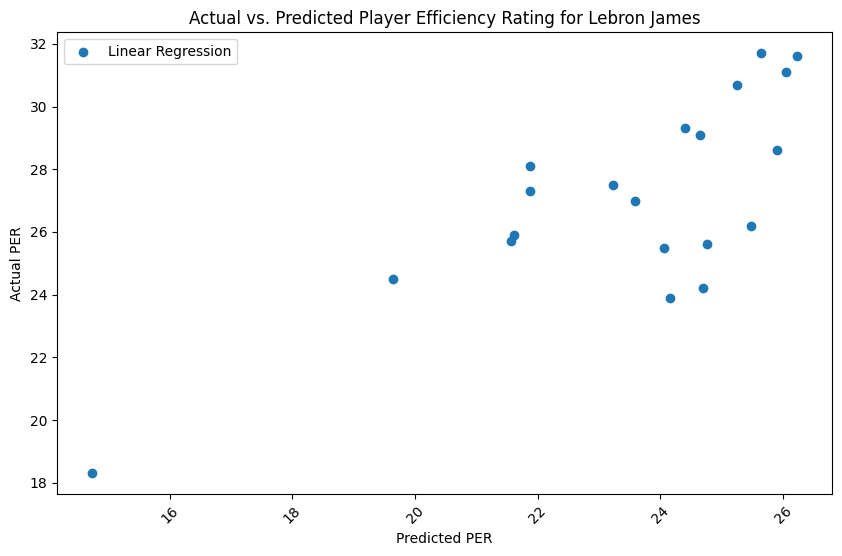

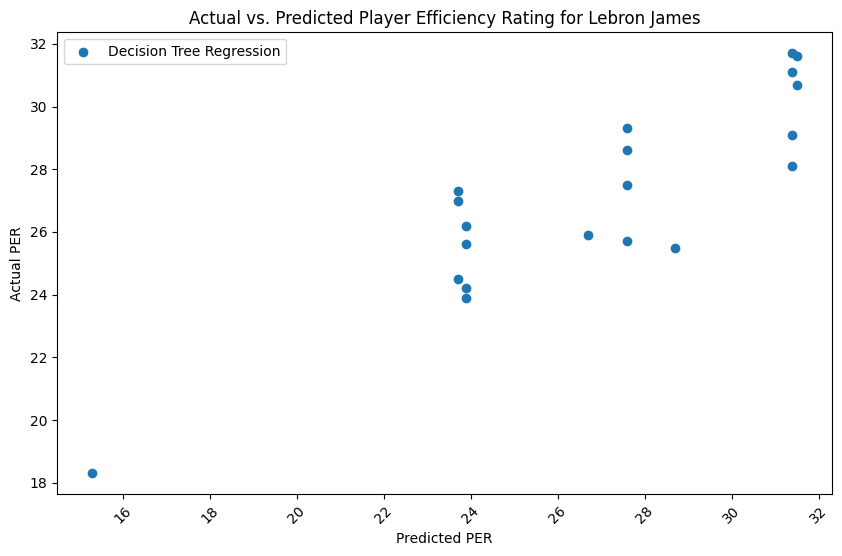

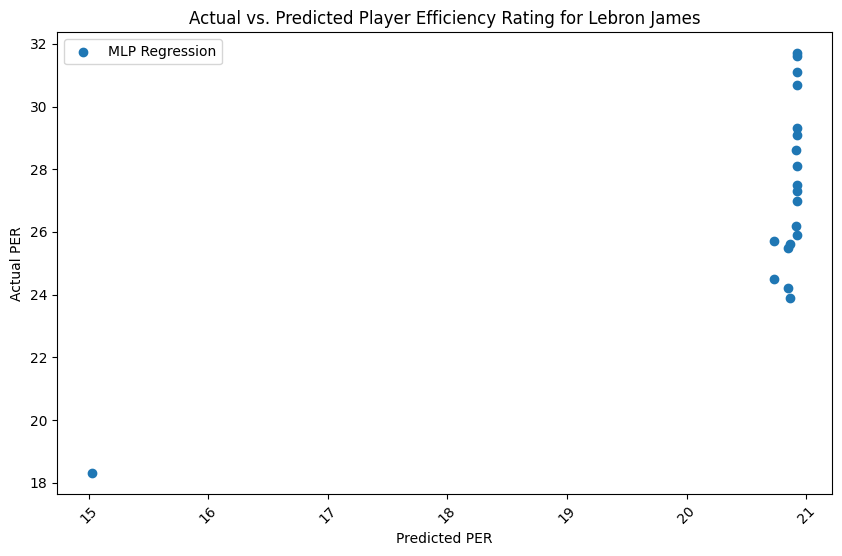

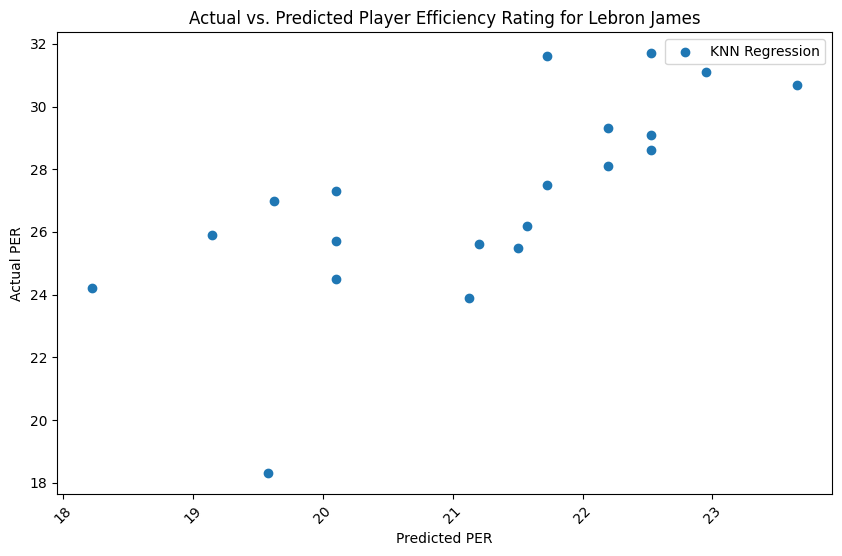

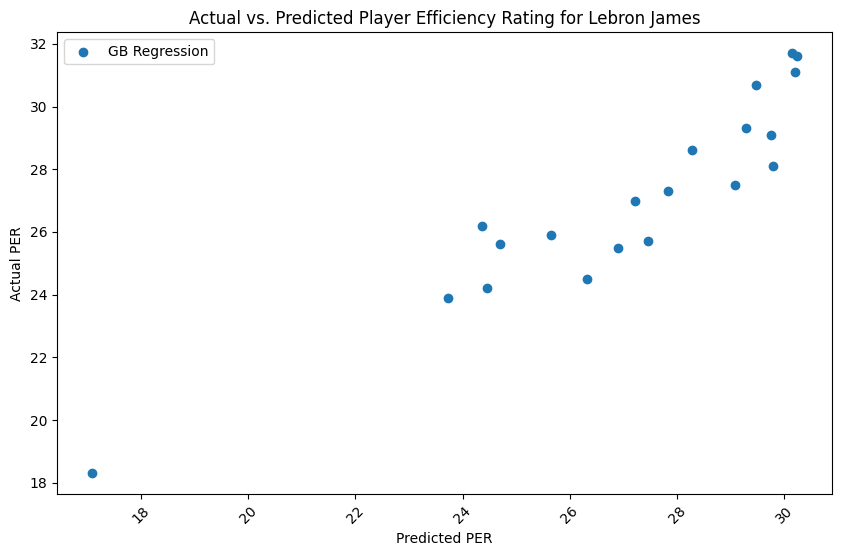

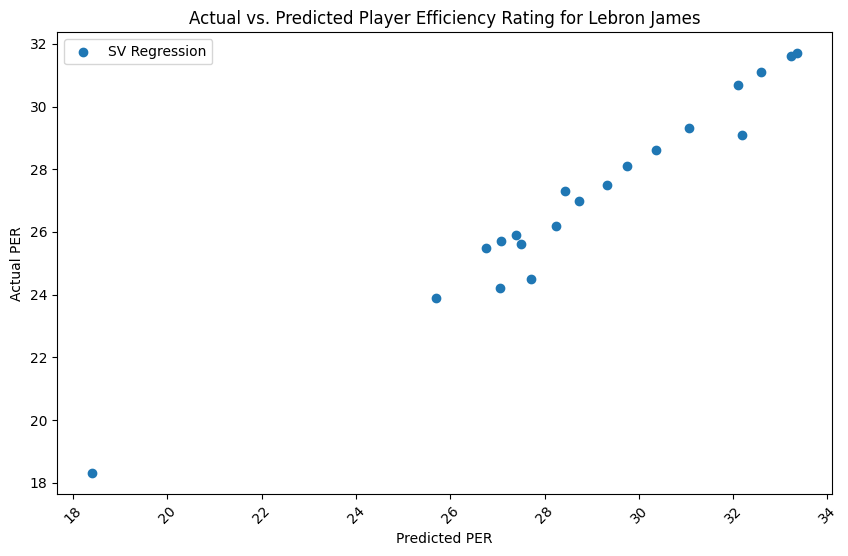

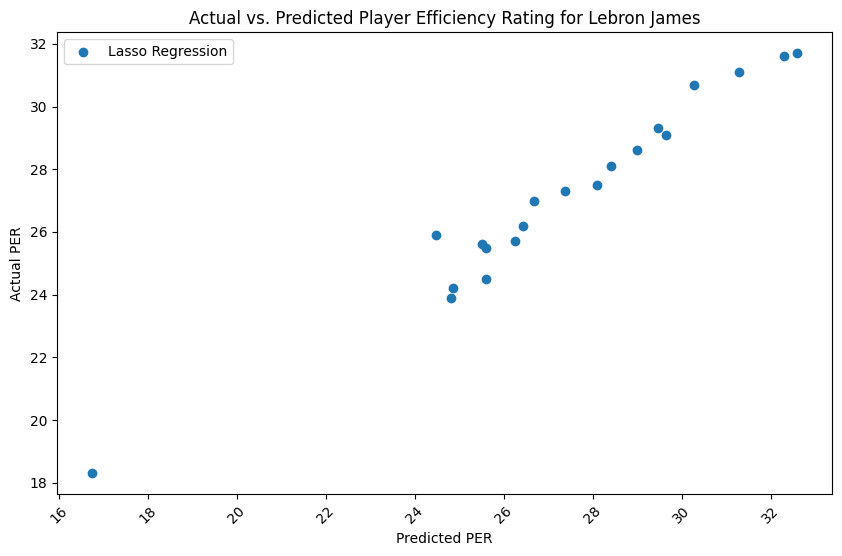

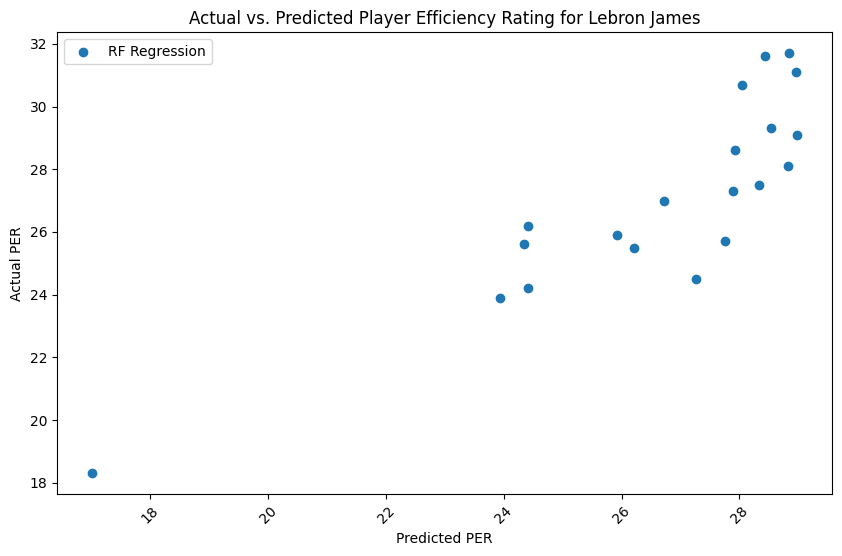

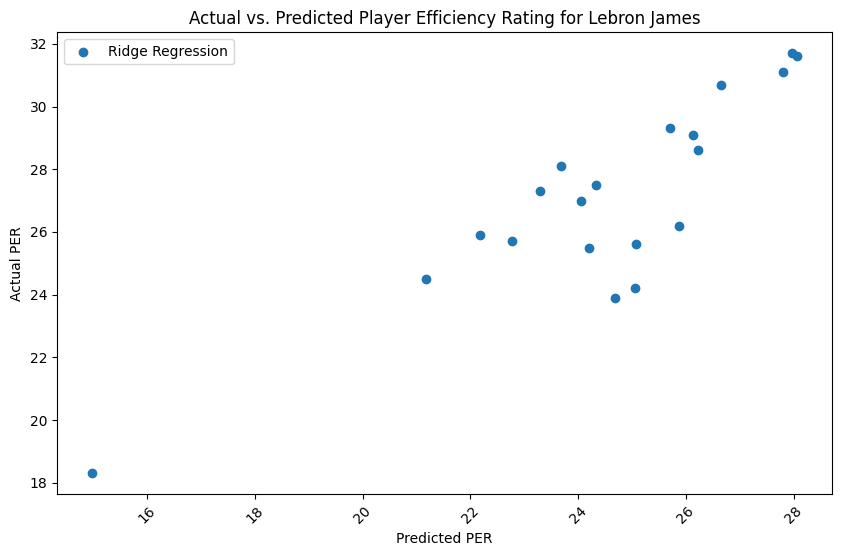

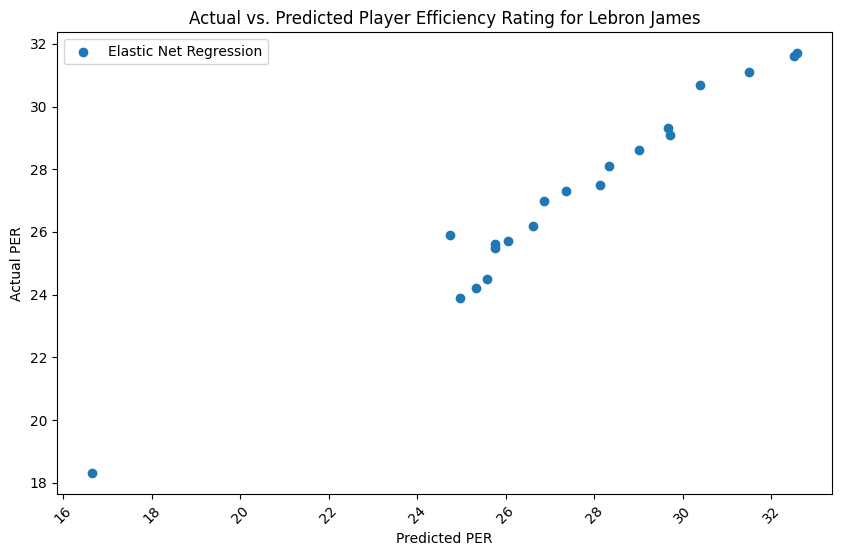

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(lin_lebron, le.PER, label='Linear Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dec_lebron, le.PER, label='Decision Tree Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mlp_lebron, le.PER, label='MLP Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(knn_lebron, le.PER, label='KNN Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(gbr_lebron, le.PER, label='GB Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(svr_lebron, le.PER, label='SV Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(lasso_lebron, le.PER, label='Lasso Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(rfr_lebron, le.PER, label='RF Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ridge_lebron, le.PER, label='Ridge Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(enr_lebron, le.PER, label='Elastic Net Regression', linestyle='-')
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.xticks(rotation=45)
plt.title(f'Actual vs. Predicted Player Efficiency Rating for Lebron James')
plt.legend()
plt.show()

The plots above are simply the predicted PER from the models vs the actual PER of the player however MLP is off by a lot and it occured after regularization.

In [133]:
#the parameters of the desired model 
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

#get the best hyperparameters
best_params

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [134]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_leaf=2, n_estimators=150, random_state=42)

In [135]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 400]
}

grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

In [136]:
best_model

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50),
             max_iter=400, random_state=42)

In [153]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}


# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knnr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_


In [154]:
best_model

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [201]:
knn2 = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn2.fit(X_train, y_train)
yknn2 = knn2.predict(X_test)

mean_squared_error(y_test, yknn2)

10.15128065621391

I didn't end up changing KNN as the results would not change much